In [1]:
import numpy as np, matplotlib.pyplot as plt
from ring_trap_nm.nelder_mead.Objective import Objective

# Minimum Energy with Fixed Momentum

# Notes
- starting with a simplex containing the entire unit cube with uniform hyperparameters on the objective function always constructs the zero potential.
    - So, the global minimum is the constant function. How do we reward getting the correct momentum more?
- It seems to be that the initial simplex matters less than the initial point (x0)
    - This may merrit a stochastic search:
        1. uniform dist of $x\in[0,1]^d$
        2. uniform dist over some set of basis functions (smooth?)
    - After doing random search like this, consider addaptive methods to refine

In [2]:
def generate_initial_simplex(dimensions=100):
    """
    Uses ideas from [here](https://math.stackexchange.com/questions/2739915/radius-of-inscribed-sphere-of-n-simplex)
    """
    verts = []
    for i in range(dimensions):
        tmp = np.zeros(dimensions)
        tmp[i] = dimensions
        verts.append(tmp)
    verts.append(np.zeros(dimensions))
    return verts
generate_initial_simplex()

[array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([  0., 100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   

In [3]:
objective_functions = (
    "get_E_expectation",
    "get_E_deviation",
    "get_dist_p_expectation",
    "get_p_deviation",
    "get_V_smoothness"
)

lambs = (
    1.0,
    1.0,
    1.0,
    1.0,
    int(1e3)
)

options = {
    "maxiter": int(1e6),
    "disp": True,
    "adaptive": True,
    "initial_simplex": generate_initial_simplex()
}


y0 = 0.5 * np.zeros(100)
obj = Objective(objective_functions=objective_functions, lambs=lambs, y0=y0)

In [4]:
ret = obj.solve(options=options)
ret

c:\Users\jbran\anaconda3\envs\ring_trap\lib\site-packages\scipy\integrate\_ivp\base.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(fun(t, y), dtype=dtype)


Optimization terminated successfully.
         Current function value: 6.283185
         Iterations: 11693
         Function evaluations: 18267


 final_simplex: (array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.53980058e-06, 9.44783437e-06, 9.42517316e-06, ...,
        1.03044613e-05, 1.03673433e-05, 1.03791693e-05],
       [4.55845367e-06, 4.51898831e-06, 4.57985284e-06, ...,
        5.15228672e-06, 5.16192136e-06, 5.15336441e-06],
       ...,
       [1.36483457e-05, 1.36462625e-05, 1.36421290e-05, ...,
        1.47750452e-05, 1.47764613e-05, 1.47673600e-05],
       [1.15375370e-05, 1.15360332e-05, 1.15430888e-05, ...,
        1.22879322e-05, 1.22740860e-05, 1.21838510e-05],
       [1.20844315e-05, 1.16637067e-05, 1.17192689e-05, ...,
        1.26884059e-05, 1.26733122e-05, 1.25156514e-05]]), array([6.28318531, 6.283268  , 6.28326822, 6.28326956, 6.28326959,
       6.28327016, 6.28327035, 6.28327061, 6.28327104, 6.28327105,
       6.28327119, 6.28327121, 6.28327124, 6.2832713 , 6.28327137,
       6.28327167, 6.28327194, 6.28327201, 6.28327229, 6.283

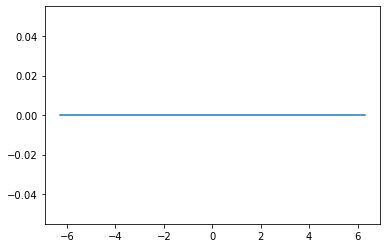

In [5]:
plt.plot(obj.xs, ret.x)

In [6]:
objvals0 = obj.compute_objective_vals()

c:\Users\jbran\anaconda3\envs\ring_trap\lib\site-packages\scipy\integrate\_ivp\base.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(fun(t, y), dtype=dtype)


In [7]:
y1 = 0.5*np.cos(obj.xs)

obj1 = Objective(objective_functions=objective_functions, y0=y1, lambs=lambs)

In [8]:
ret1 = obj1.solve(options=options)
ret1

Optimization terminated successfully.
         Current function value: 24.281312
         Iterations: 520610
         Function evaluations: 594369


 final_simplex: (array([[-0.17883621, -0.18076049, -0.19155771, ..., -0.19987242,
        -0.18863944, -0.19480376],
       [-0.17883732, -0.1807569 , -0.19155346, ..., -0.19987506,
        -0.18863482, -0.19479988],
       [-0.17883598, -0.18075861, -0.1915548 , ..., -0.19987536,
        -0.18863441, -0.19480191],
       ...,
       [-0.1788252 , -0.18075991, -0.19155275, ..., -0.19987505,
        -0.18864171, -0.19480623],
       [-0.1788438 , -0.18076107, -0.19156056, ..., -0.19987174,
        -0.18863722, -0.19479856],
       [-0.17884191, -0.18075981, -0.19155745, ..., -0.19987255,
        -0.18863647, -0.19479839]]), array([24.28131165, 24.28131504, 24.28131579, 24.28132034, 24.28132641,
       24.28132718, 24.28132866, 24.28132934, 24.28133536, 24.28133675,
       24.28133979, 24.28134108, 24.28134262, 24.28134363, 24.28134402,
       24.2813467 , 24.2813469 , 24.28134716, 24.28134807, 24.28134868,
       24.28135266, 24.28135284, 24.28135441, 24.28135465, 24.2813554 ,
       24

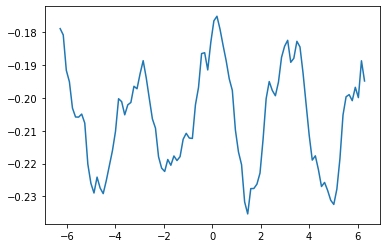

In [9]:
plt.plot(obj1.xs, ret1.x)

In [10]:
objvals1 = obj1.compute_objective_vals()
objvals1

c:\Users\jbran\anaconda3\envs\ring_trap\lib\site-packages\scipy\integrate\_ivp\base.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(fun(t, y), dtype=dtype)


array([9.90220290e+00, 8.31723820e-05, 1.60228672e+00, 7.05732236e+00,
       5.71945354e-03])

In [11]:
objvals0 - objvals1

array([-9.90220290e+00, -8.31723820e-05,  4.68089859e+00, -7.05732236e+00,
       -5.71935447e-03])